# Boston_Housing Prediction

## 1. Import the data

In [11]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/Users/guiguibaba/Desktop/重要的东东/机器学习/boston_housing-master/housing.csv')

In [5]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## 2. EDA

### (1). Basic Info

In [6]:
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)

In [10]:
prices.describe()

count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64

In [29]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 3 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
dtypes: float64(3)
memory usage: 11.5 KB


### (2) Data Visualization

In [ ]:
# We have three features
# 'RM' represents for average room number of each house
# 'LSTAT' represents for the percentage of low_income house holder
# 'PTRATIO' represents for the ratio of students and teachers in local primary school and middle school

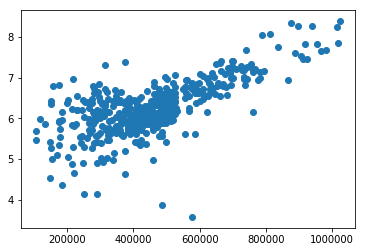

In [13]:
# More the average room number, the higher the prices
plt.scatter(prices,df['RM'])
plt.show()

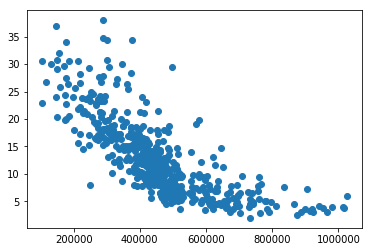

In [14]:
# Lower the percentage of low_income house holder, the higher the prices
plt.scatter(prices,df['LSTAT'])
plt.show()

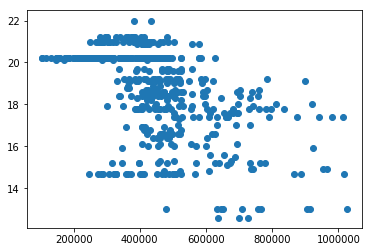

In [15]:
# The ratio of students and teachers is not so obvious with the prices
plt.scatter(prices,df['PTRATIO'])
plt.show()

## 3.Model Building and Prediction 

### (1) The Performance of the model

In [30]:
from sklearn.metrics import r2_score

### (2) Data split and Training

In [43]:
import numpy as np

from sklearn.model_selection import train_test_split
train_X, val_X = train_test_split(features,test_size=0.2,random_state=10)
train_y, val_y = train_test_split(prices,test_size=0.2,random_state=10)

In [44]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [47]:
def best_model(train_X, train_y):
    
    cross_validator = KFold(n_splits=10)
    
    regressor = DecisionTreeRegressor()

    params = {'max_depth':range(1,11)}

    score = make_scorer(r2_score)

    grid = GridSearchCV(regressor,params,scoring=score,cv=cross_validator)

    grid = grid.fit(train_X, train_y)

    return grid.best_estimator_

In [49]:
# Print the best model with tuned parameters

optimal_model = best_model(train_X, train_y)
optimal_model

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### (3).Prediction

In [51]:
predict_y = optimal_model.predict(val_X)
accuracy = r2_score(val_y,predict_y)
accuracy

0.7459812985901584